# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [300]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [301]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [302]:
# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [303]:
# Create empty lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = [] 
wind_speed = []
countries = []
date = []

# Specify the url
base_url = f"http://api.openweathermap.org/data/2.5/find?units=imperial&appid={weather_api_key}&q="

# Set beginning record and sets to be 1
record = 1
sets = 1

# Print to show the beginning of data retrieval
print("Beginning Data Retrieval")
print("--------------------------")

# Record the time when we start to request data from API
time2 = time.time()


# Write a for loop to record information about the city each time when we request a different city
for city in cities:
    
    # Try to get the information for each city
    try:
        
        # Separate cities into 50 cities per set
        # Print which record and set the city is
        print(f"Processing Record {record} of Set {sets} | {city}")
        
        # Get request from API and store it
        response = requests.get(base_url+city).json()

        # Add city name, latitude, longitude, max temperature, humidity, cloudiness, wind speed, countries, and date into their own lists
        city_name.append(response["list"][0]["name"])
        lat.append(response["list"][0]["coord"]["lat"])
        lng.append(response["list"][0]["coord"]["lon"])
        max_temp.append(response["list"][0]["main"]["temp_max"])
        humidity.append(response["list"][0]["main"]["humidity"])
        cloudiness.append(response["list"][0]["clouds"]["all"])
        wind_speed.append(response["list"][0]["wind"]["speed"])
        countries.append(response["list"][0]["sys"]["country"])
        date.append(response["list"][0]["dt"])
        
        
    # Handle exceptions for a city that is not available in the openweathermap API    
    except:
        print("City not found. Skipping...")
    
    # Add one to record for the next city
    record +=1
    
    # Since the openweathermap API limit is 60 API calls per minute, we are limiting our request to 50 API calls per minute
    if record>50:
        
        # Record the time when we are done looping through 50 API calls
        time1 = time.time()
        
        # Reset record back to 1
        record = 1
        
        # Add 1 to set for the next set of 50 API calls
        sets += 1
        
        # Wait so that we spend a whole minute before starting the next set
        time.sleep(60-(time1-time2))
        
        # Record the time when we start to request data from API again
        time2 = time.time()

# Print data retrieval complete
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | tubruq
City not found. Skipping...
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | hovd
Processing Record 5 of Set 1 | panlaitan
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | dwarka
Processing Record 10 of Set 1 | ampanihy
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | boyolangu
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | inuvik
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | kamaishi
Processing Record 22 of Set 1 | angul
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [304]:
# Makding sure all the lists have the same amount of elements in them so we can create a data frame
print(len(city_name))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(countries))
print(len(date))

548
548
548
548
548
548
548
548
548


In [305]:
# Create a dataframe with all the information we recorded 
city_data_df = pd.DataFrame(
    {"City":city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, 
     "Wind Speed": wind_speed, "Country": countries, "Date": date}
)

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany County,42.6001,-73.9662,64.40,63,75,8.05,US,1589836347
1,Hithadhoo,-0.6000,73.0833,84.60,75,100,23.02,MV,1589835969
2,Khovd,48.0056,91.6419,57.52,37,33,2.04,MN,1589836176
3,Panlaitan,12.1191,119.8486,84.42,72,59,1.52,PH,1589836281
4,Mataura,-46.1927,168.8643,36.10,89,11,2.10,NZ,1589836648
...,...,...,...,...,...,...,...,...,...
543,Pacific Grove,36.6177,-121.9166,68.00,49,75,11.41,US,1589836622
544,Tuzha,57.6062,47.9360,46.22,85,100,6.35,RU,1589835917
545,Ciudad Lázaro Cárdenas,17.9583,-102.2000,85.91,45,65,12.59,MX,1589836570
546,Atambua,-9.1061,124.8925,73.49,79,100,5.88,ID,1589836179


In [306]:
# Count number of rows we have for each column
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [307]:
# Drop the "City" and "Country" column so the new dataframe only has numeric data
num_city_data = city_data_df.drop(["City", "Country"], axis = 1)

# Count number of rows in the dataframe for each column
city_data_count = num_city_data.count()

# Calculate the mean of each column
city_data_mean = num_city_data.mean()

# Calculate the standard deviation for each column
city_data_std = num_city_data.std()

# Calculate the 0.25, 0.5, and 0.75 quartiles for each column and rename the index
quartiles = num_city_data.quantile(q=[0.25, 0.5, 0.75]).rename(index = {0.25:"25%", 0.5:"50%", 0.75:"75%"})

# Calculate the maximum value for each column
city_data_max = num_city_data.max()

# Calculate the minimum value for each column
city_data_min = num_city_data.min()

# Name the series
city_data_max.name = "max"

# Create a dataframe that shows the number of counts, mean, standard deviation, minimum, maximum, and quartiles of city_data_df
ana_city_data = pd.DataFrame({"count":city_data_count, "mean":city_data_mean, "std":city_data_std, "min":city_data_min}).T
ana_city_data = ana_city_data.append(quartiles)
ana_city_data = ana_city_data.append(city_data_max)

ana_city_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,18.806136,20.041101,65.329489,68.032847,53.505474,7.824836,1.589836e+09
std,32.968154,89.078586,16.581457,21.489822,38.892365,5.303333,1.953732e+02
min,-54.800000,-175.200000,24.670000,3.000000,0.000000,0.070000,1.589836e+09
25%,-8.292775,-58.671850,53.600000,56.000000,11.000000,3.567500,1.589836e+09
50%,20.872350,25.985050,66.595000,72.000000,59.000000,6.735000,1.589836e+09
75%,47.421925,96.188875,79.337500,83.000000,93.000000,11.187500,1.589836e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,26.400000,1.589837e+09


In [308]:
#  Get the indices of cities that have humidity over 100%.
city_data_df_index = city_data_df.loc[city_data_df["Humidity"]>100,:].index
city_data_df_index

Int64Index([], dtype='int64')

In [309]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(index=city_data_df_index)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany County,42.6001,-73.9662,64.40,63,75,8.05,US,1589836347
1,Hithadhoo,-0.6000,73.0833,84.60,75,100,23.02,MV,1589835969
2,Khovd,48.0056,91.6419,57.52,37,33,2.04,MN,1589836176
3,Panlaitan,12.1191,119.8486,84.42,72,59,1.52,PH,1589836281
4,Mataura,-46.1927,168.8643,36.10,89,11,2.10,NZ,1589836648
...,...,...,...,...,...,...,...,...,...
543,Pacific Grove,36.6177,-121.9166,68.00,49,75,11.41,US,1589836622
544,Tuzha,57.6062,47.9360,46.22,85,100,6.35,RU,1589835917
545,Ciudad Lázaro Cárdenas,17.9583,-102.2000,85.91,45,65,12.59,MX,1589836570
546,Atambua,-9.1061,124.8925,73.49,79,100,5.88,ID,1589836179


In [311]:
# Name the index
clean_city_data.index.name = "City_ID"

# Extract relevant fields from the data frame
clean_city_data = clean_city_data[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
clean_city_data

# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

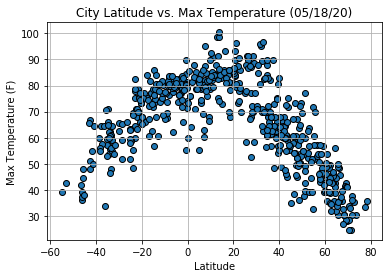

In [313]:
# Plot a scatter plot for Latitude vs. Temperature
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker = "o", edgecolors = "black")

# Add gridlines
plt.grid()

# Add xlabel, ylabel, and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (05/18/20)")

# Store current figure
lat_temp = plt.gcf()

# Save the graph as .png
lat_temp.savefig('../output_data/Latitude vs. Temperature Plot.png', bbox_inches = "tight")

# Show the graph
plt.show()

## Latitude vs. Humidity Plot

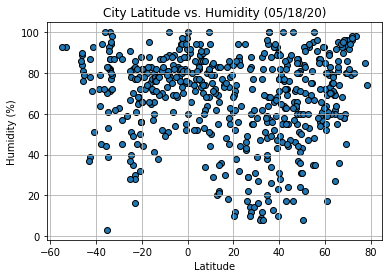

In [315]:
# Plot a scatter plot for Latitude vs. Humidity 
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolors = "black")

# Add gridlines
plt.grid()

# Add xlabel, ylabel, and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (05/18/20)")

# Store current figure
lat_hum = plt.gcf()

# Save the graph as .png
lat_hum.savefig('../output_data/Latitude vs. Humidity Plot.png', bbox_inches = "tight")

# Show the graph
plt.show()

## Latitude vs. Cloudiness Plot

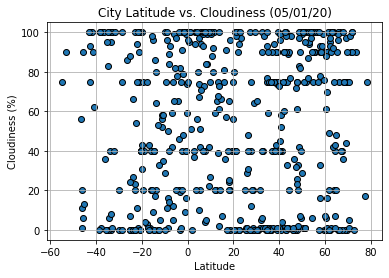

In [316]:
# Plot a scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolors = "black")

# Add gridlines
plt.grid()

# Add xlabel, ylabel, and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (05/01/20)")

# Store current figure
lat_cloud = plt.gcf()

# Save the graph as .png
lat_cloud.savefig('../output_data/Latitude vs. Cloudiness Plot.png', bbox_inches = "tight")

# Show the graph
plt.show()

## Latitude vs. Wind Speed Plot

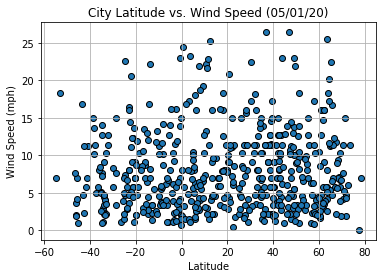

In [317]:
# Plot a scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolors = "black")

# Add gridlines
plt.grid()

# Add xlabel, ylabel, and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (05/01/20)")

# Store current figure
lat_wind = plt.gcf()

# Save the graph as .png
lat_wind.savefig('../output_data/Latitude vs. Wind Speed Plot.png', bbox_inches = "tight")

# Show the graph
plt.show()

## Linear Regression

In [318]:
# Create a function to create Linear Regression plots
def linear_regression(x_values, y_values, xpos, ypos):
    
    # Plot a scatter plot
    plt.scatter(x_values, y_values, alpha = 0.5)
    
    # Calculate and store the slope, intercept, rvalue, pvalue, and standard error streams using linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Set the y value 
    y = slope*x_values+intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # Plot and annotate the line equation
    plt.plot(x_values, y, color = "red")
    plt.annotate(line_eq,(xpos,ypos),fontsize=15,color="red")
    
    # Store and print r-squared
    r_square = rvalue**2
    print(f"The r-squared is: {r_square}")

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6964105094968973


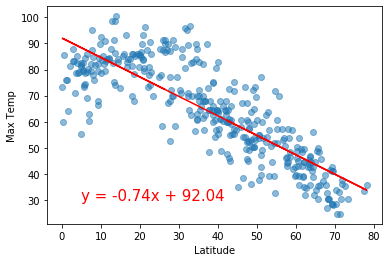

In [319]:
# Create a dataframe that only contains data frame the northern hemisphere
north_city = clean_city_data.loc[clean_city_data["Lat"]>0,:]

# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(north_city["Lat"], north_city["Max Temp"], 5, 30)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

# From the linear regression model we can see that as latitude becomes larger, the temperature goes down on the northern hemisphere. 
# From the r-squared, we can see that model explains around 70% of the variability of the response data around its mean

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6355526239854055


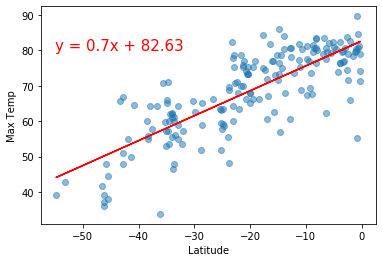

In [320]:
# Create a dataframe that only contains data frame the northern hemisphere
south_city = clean_city_data.loc[clean_city_data["Lat"]<0,:]

# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(south_city["Lat"], south_city["Max Temp"], -55, 80)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

# From the linear regression model we can see that as latitude becomes larger, the temperature goes up on the southern hemisphere. 
# From the r-squared, we can see that model explains around 64% of the variability of the response data around its mean

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008954363404028646


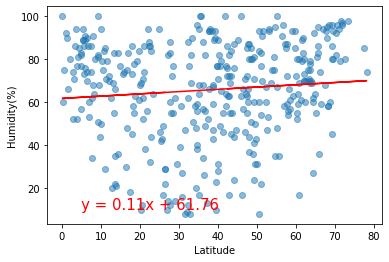

In [321]:
# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(north_city["Lat"], north_city["Humidity"], 5, 10)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

# From the linear regression model we can see that humidity and latitude are independent variables, they do not impact each other. 
# From the r-squared, we can see that model explains almost none of the variability of the response data around its mean.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008061697451808361


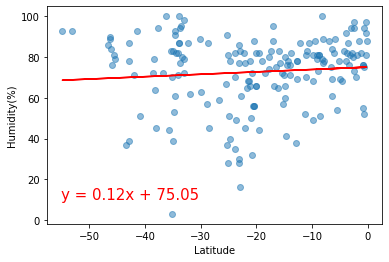

In [323]:
# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(south_city["Lat"], south_city["Humidity"], -55, 10)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

# From the linear regression model we can see that humidity and latitude are independent variables, they do not impact each other. 
# From the r-squared, we can see that model explains almost none of the variability of the response data around its mean.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.704960124395282e-05


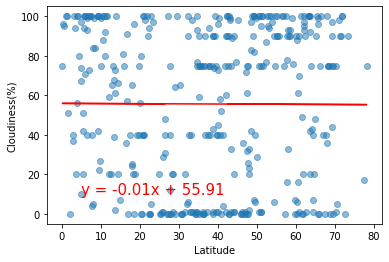

In [324]:
# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(north_city["Lat"], north_city["Cloudiness"], 5, 10)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

# From the linear regression model we can see that cloudiness and latitude are independent variables, they do not impact each other. 
# From the r-squared, we can see that model explains almost none of the variability of the response data around its mean.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000250820249156914


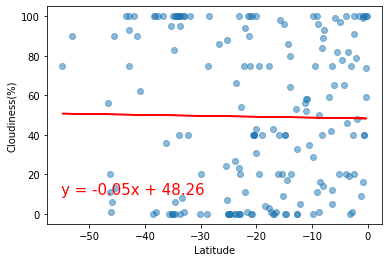

In [325]:
# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(south_city["Lat"], south_city["Cloudiness"], -55, 10)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

# From the linear regression model we can see that cloudiness and latitude are independent variables, they do not impact each other. 
# From the r-squared, we can see that model explains almost none of the variability of the response data around its mean.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0023850701216741564


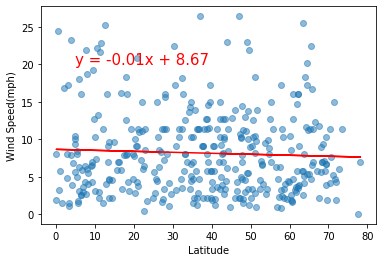

In [327]:
# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(north_city["Lat"], north_city["Wind Speed"], 5, 20)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

# From the linear regression model we can see that wind speed and latitude are independent variables, they do not impact each other. 
# From the r-squared, we can see that model explains almost none of the variability of the response data around its mean.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 9.56923995916255e-05


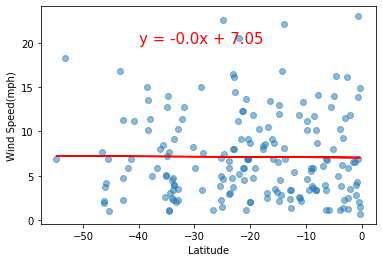

In [328]:
# Create a scatter plot, linear regression plot, and annotate the line equation
linear_regression(south_city["Lat"], south_city["Wind Speed"], -40, 20)

# Label and show the graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

# From the linear regression model we can see that wind speed and latitude are independent variables, they do not impact each other. 
# From the r-squared, we can see that model explains almost none of the variability of the response data around its mean.